# Bibineyshvili, et al. 2019 plot code

# Figure 1
## G

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


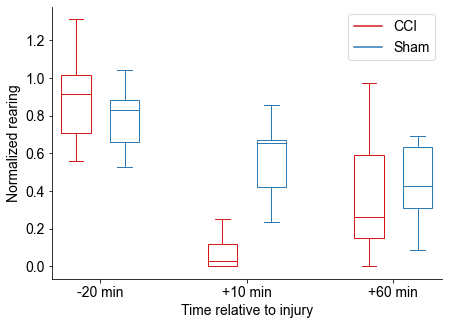

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import pandas as pd

plt.rcParams['font.family'] = "Arial"
plt.rcParams.update({'font.size': 14})
plt.rcParams['savefig.bbox'] = 'tight'


mat = scipy.io.loadmat('normRearing.mat')
nR = mat['nR']
injured = nR[:,(0,2,4)]
sham = nR[:,(1,3,5)]
no_nan_sham = sham[0:-1]







def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
f, ax = plt.subplots(figsize=(7, 5))


g1 = np.array([0,3,6])
g2 = np.array([1,4,7])
g3 = np.array(g2)-0.5

bpl = plt.boxplot(injured, positions = g1 , sym='', widths=0.6)
bpr = plt.boxplot(no_nan_sham,positions = g2 , sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='CCI')
plt.plot([], c='#2C7BB6', label='Sham')
plt.legend()
x_label_list = ['-20 min', '+10 min', '+60 min']
ax.set_xticks(g3)
ax.set_xticklabels(x_label_list)
ax.set_xlabel('Time relative to injury')
ax.set_ylabel('Normalized rearing')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.savefig('1G.eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


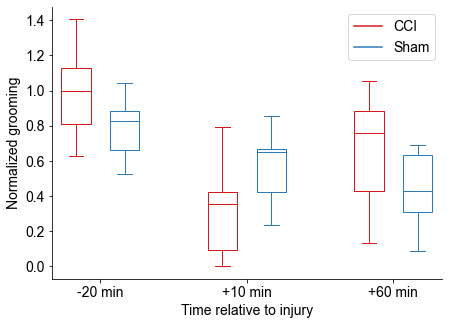

In [2]:
mat = scipy.io.loadmat('normGrooming.mat')
nG = mat['nG']
injured = nG[:,(0,2,4)]
sham = nG[:,(1,3,5)]

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
f, ax = plt.subplots(figsize=(7, 5))


g1 = np.array([0,3,6])
g2 = np.array([1,4,7])
g3 = np.array(g2)-0.5

bpl = plt.boxplot(injured, positions = g1 , sym='', widths=0.6)
bpr = plt.boxplot(no_nan_sham,positions = g2 , sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='CCI')
plt.plot([], c='#2C7BB6', label='Sham')
plt.legend()
x_label_list = ['-20 min', '+10 min', '+60 min']
ax.set_xticks(g3)
ax.set_xticklabels(x_label_list)
ax.set_xlabel('Time relative to injury')
ax.set_ylabel('Normalized grooming')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('1H.eps')

# Figure 2
## F

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


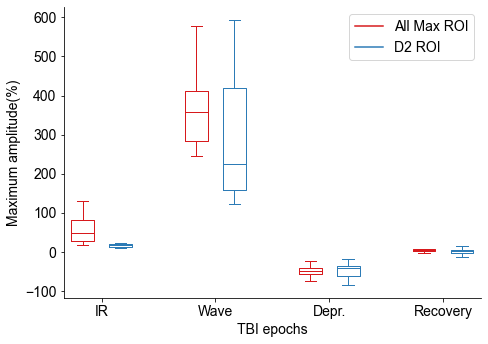

In [3]:
mat = scipy.io.loadmat('fig2_F.mat')
ROI = mat['resultsEvMouse']
Max_ROI = ROI[:,(0,2,4,6)]
D2_ROI = ROI[:,(1,3,5,7)]

D2_ROI = np.delete(D2_ROI, (1), axis=0)
  
f, ax = plt.subplots(figsize=(7, 5))


g1 = np.array([0,3,6,9])
g2 = np.array([1,4,7,10])
g3 = np.array(g2)-0.5

bpl = plt.boxplot(Max_ROI, positions = g1 , sym='', widths=0.6)
bpr = plt.boxplot(D2_ROI,positions = g2 , sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='All Max ROI')
plt.plot([], c='#2C7BB6', label='D2 ROI')
plt.legend()
x_label_list = ['IR', 'Wave', 'Depr.', 'Recovery']
ax.set_xticks(g3)
ax.set_xticklabels(x_label_list)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



plt.xlabel('TBI epochs')
plt.ylabel('Maximum amplitude(%)')

plt.savefig('2F.eps')

plt.tight_layout()
plt.show()

# Figure 3
## E

<ipython-input-4-1e5fdf99a86d>:5: RuntimeWarning: Mean of empty slice
  avg_ROI = np.nanmean(Data, axis=0)
C:\Users\tomva\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparenc

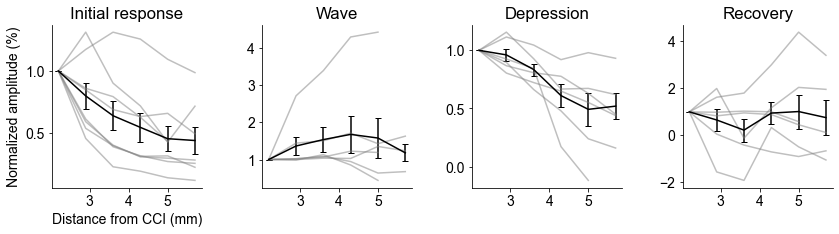

In [4]:
mat = scipy.io.loadmat('fig3_E.mat')

Data = np.dstack((mat['IR'], mat['W'], mat['D'], mat['R']))

avg_ROI = np.nanmean(Data, axis=0)

sem_ROI = (np.nanstd(Data, axis=0)/np.sqrt(np.sum(~np.isnan(Data), axis=0)))

# create plot
fig, ax = plt.subplots(1,4, figsize=(14,3))
index = np.array((2.2,2.9,3.6,4.3,5,5.7))
titles = ['Initial response','Wave','Depression','Recovery']
fig.subplots_adjust(wspace = 0.4)

for j in range(0, len(ax)):
    ax[j].errorbar(index, avg_ROI[0:6,j], fmt='k-', yerr=sem_ROI[0:6,j], capsize=3)
    ax[j].plot(index, Data[:,0:6,j].T, '0.5', alpha = 0.5)
    ax[j].set_title(titles[j])
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)


ax[0].set_ylabel('Normalized amplitude (%)')
ax[0].set_xlabel('Distance from CCI (mm)')

plt.savefig('3E.eps')

plt.show()

## F

<>:13: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-5-20eb1a4037c2>:13: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if j is not 2:
<ipython-input-5-20eb1a4037c2>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if j is 2:
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


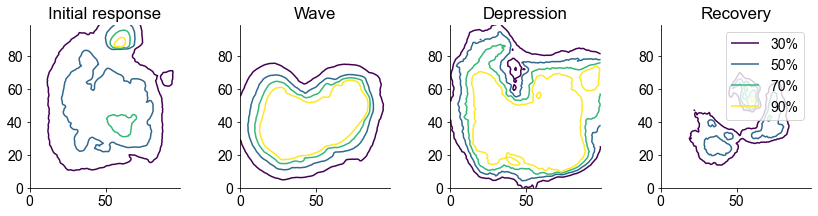

In [5]:
mat = scipy.io.loadmat('fig3_F.mat')

Data = mat['Cont']
Levels = mat['Levels']


# create plot
fig, ax = plt.subplots(1,4, figsize=(14,3))
titles = ['Initial response','Wave','Depression','Recovery']
fig.subplots_adjust(wspace = 0.4)

for j in range(0, len(ax)):
    if j is not 2:
        cs = ax[j].contour(Data[:,:,j].T, Levels[::-1,j])
    if j is 2:
        ax[j].contour(Data[:,:,j].T, Levels[:,j])
        
    ax[j].set_title(titles[j])
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)

labels = ['30%','50%','70%','90%']

for i in range(len(labels)):
    cs.collections[i].set_label(labels[i])

plt.legend()
plt.savefig('3F.eps')
plt.show()



# Figure 4
## E

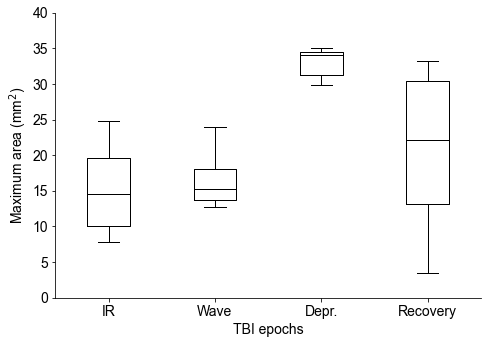

In [6]:
mat = scipy.io.loadmat('fig4_E.mat')
Carea = mat['resultEvMouse']

Carea = np.delete(Carea, (2,3,5), axis=0)
  
f, ax = plt.subplots(figsize=(7, 5))

g1 = np.array([1,2,3,4])

bpl = plt.boxplot(Carea, positions = g1 , sym='', widths=0.4)

set_box_color(bpl, '#000') # colors are from http://colorbrewer2.org/


# draw temporary red and blue lines and use them to create a legend
x_label_list = ['IR', 'Wave', 'Depr.', 'Recovery']
ax.set_xticks(g1)
ax.set_xticklabels(x_label_list)

plt.xlabel('TBI epochs')
plt.ylabel('Maximum area (mm$^2$)')
plt.ylim([0, 40])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.savefig('4E.eps')

plt.show()

In [7]:
print(Carea)

[[21.4117186  12.73751311 29.86094301 32.91998171]
 [ 8.79012346 13.97068237 34.01328707 27.91382232]
 [17.89770723 15.252804   32.28725894 14.34637833]
 [ 7.75543798 17.49718927 30.13884182 11.89348826]
 [11.46462865 13.43640227 34.85214772  3.47658624]
 [24.84185773 18.71787837 35.03267974 33.15785793]
 [14.58906526 23.91726512 34.06008768 22.16261868]]


# Figure 6
## H

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


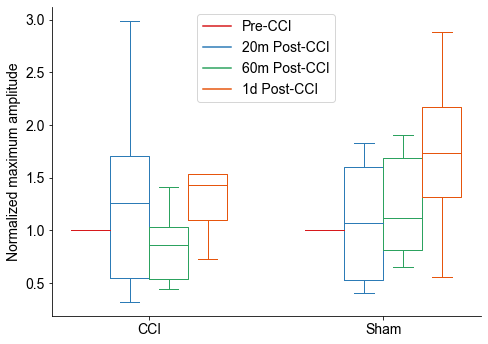

In [8]:
mat = scipy.io.loadmat('fig6_HIJ.mat')

Data = np.dstack((mat['injAmp'], mat['shamAmp']))
avg_base = Data[3,:,:]
norm_Data = Data / avg_base

norm_avg_base = norm_Data[3,:,:]
norm_20 = norm_Data[4,:,:]
norm_60 = norm_Data[5,:,:]
norm_1 = norm_Data[6,:,:]


def remove_nan(stupid):
    stupid_1 = stupid[~np.isnan(stupid[:,0]),0]
    stupid_2 = stupid[~np.isnan(stupid[:,1]),1]

    return [stupid_1, stupid_2]


norm_avg_base = remove_nan(norm_avg_base)
norm_20 = remove_nan(norm_20)
norm_60 = remove_nan(norm_60)
norm_1 = remove_nan(norm_1)


f, ax = plt.subplots(figsize=(7, 5))


g1 = np.array([0,3])
g2 = np.array([0.5,3.5])
g3 = np.array([1,4])
g4 = np.array([1.5,4.5])

bpb = plt.boxplot(norm_avg_base, positions = g1 , sym='', widths=0.5)
bp2 = plt.boxplot(norm_20, positions = g2 , sym='', widths=0.5)
bpp = plt.boxplot(norm_60, positions = g3, sym='', widths=0.5)
bpd = plt.boxplot(norm_1, positions = g4, sym='', widths=0.5)

set_box_color(bpb, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bp2, '#2C7BB6')
set_box_color(bpp, '#2CA25F')
set_box_color(bpd, '#E6550D')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Pre-CCI')
plt.plot([], c='#2C7BB6', label='20m Post-CCI')
plt.plot([], c='#2CA25F', label='60m Post-CCI')
plt.plot([], c='#E6550D', label='1d Post-CCI')
plt.legend()
x_label_list = ['CCI','Sham']
ax.set_xticks([0.75,3.75])
ax.set_xticklabels(x_label_list)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



plt.ylabel('Normalized maximum amplitude')

plt.savefig('6H.eps')

plt.tight_layout()
plt.show()

<ipython-input-9-3ff7ec644a47>:4: RuntimeWarning: Mean of empty slice
  avg_base = np.nanmean(Data[0:3,:,:], axis=0)
<ipython-input-9-3ff7ec644a47>:7: RuntimeWarning: Mean of empty slice
  norm_avg_base = np.nanmean(norm_Data[0:3,:,:], axis=0)
<ipython-input-9-3ff7ec644a47>:9: RuntimeWarning: Mean of empty slice
  norm_avg_post = np.nanmean(norm_Data[4:9,:,:], axis=0)


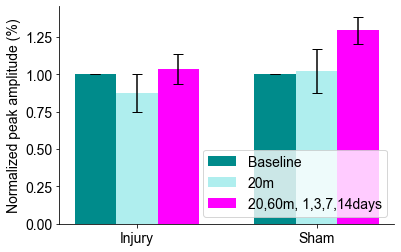

In [9]:
mat = scipy.io.loadmat('fig6_HIJ.mat')

Data = np.dstack((mat['injAmp'], mat['shamAmp']))
avg_base = np.nanmean(Data[0:3,:,:], axis=0)
norm_Data = Data / avg_base

norm_avg_base = np.nanmean(norm_Data[0:3,:,:], axis=0)
norm_20 = norm_Data[4,:,:]
norm_avg_post = np.nanmean(norm_Data[4:9,:,:], axis=0)

norm = np.dstack((norm_avg_base, norm_20, norm_avg_post))
norm_avg = np.nanmean(norm, axis=0)
norm_sem = (np.nanstd(norm, axis=0)/np.sqrt(np.sum(~np.isnan(norm), axis=0)))

N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars
ind = ind*1.3
fig, ax = plt.subplots()
color_vector = ['darkcyan','paleturquoise','fuchsia']
rects = [0]*3 #Pre-alocate list

for x in range(0, 3):
    rects[x] = plt.bar(ind + (width * x), norm_avg[:,x], width, color=color_vector[x], yerr=norm_sem[:,x], capsize=5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Normalized peak amplitude (%)')
plt.xticks(ind + width, ('Injury', 'Sham'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend((rects[0], rects[1], rects[2]), ('Baseline', '20m','20,60m, 1,3,7,14days'), loc = 'lower right')
plt.show()


## I

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


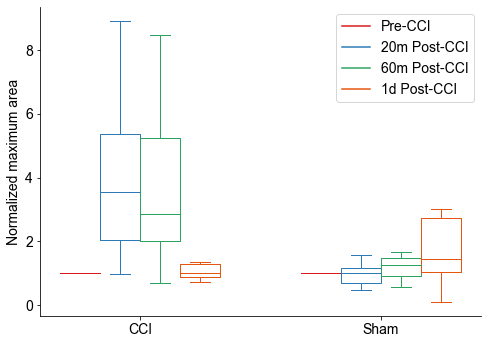

In [10]:
mat = scipy.io.loadmat('fig6_HIJ.mat')

Data = np.dstack((mat['injArea'], mat['shamArea']))
avg_base = Data[3,:,:]
norm_Data = Data / avg_base

norm_avg_base = norm_Data[3,:,:]
norm_20 = norm_Data[4,:,:]
norm_60 = norm_Data[5,:,:]
norm_1 = norm_Data[6,:,:]


def remove_nan(stupid):
    stupid_1 = stupid[~np.isnan(stupid[:,0]),0]
    stupid_2 = stupid[~np.isnan(stupid[:,1]),1]

    return [stupid_1, stupid_2]


norm_avg_base = remove_nan(norm_avg_base)
norm_20 = remove_nan(norm_20)
norm_60 = remove_nan(norm_60)
norm_1 = remove_nan(norm_1)


f, ax = plt.subplots(figsize=(7, 5))


g1 = np.array([0,3])
g2 = np.array([0.5,3.5])
g3 = np.array([1,4])
g4 = np.array([1.5,4.5])

bpb = plt.boxplot(norm_avg_base, positions = g1 , sym='', widths=0.5)
bp2 = plt.boxplot(norm_20, positions = g2 , sym='', widths=0.5)
bpp = plt.boxplot(norm_60, positions = g3, sym='', widths=0.5)
bpd = plt.boxplot(norm_1, positions = g4, sym='', widths=0.5)

set_box_color(bpb, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bp2, '#2C7BB6')
set_box_color(bpp, '#2CA25F')
set_box_color(bpd, '#E6550D')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Pre-CCI')
plt.plot([], c='#2C7BB6', label='20m Post-CCI')
plt.plot([], c='#2CA25F', label='60m Post-CCI')
plt.plot([], c='#E6550D', label='1d Post-CCI')
plt.legend()
x_label_list = ['CCI','Sham']
ax.set_xticks([0.75,3.75])
ax.set_xticklabels(x_label_list)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



plt.ylabel('Normalized maximum area')

plt.savefig('6I.eps')

plt.tight_layout()
plt.show()

<ipython-input-11-746ac774deaa>:2: RuntimeWarning: Mean of empty slice
  avg_base = np.nanmean(Data[0:3,:,:], axis=0)
<ipython-input-11-746ac774deaa>:5: RuntimeWarning: Mean of empty slice
  norm_avg_base = np.nanmean(norm_Data[0:3,:,:], axis=0)
<ipython-input-11-746ac774deaa>:7: RuntimeWarning: Mean of empty slice
  norm_avg_post = np.nanmean(norm_Data[4:9,:,:], axis=0)


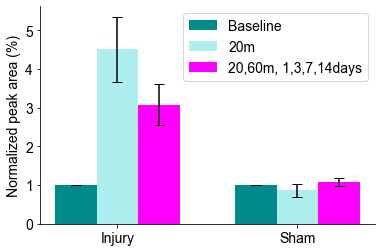

In [11]:
Data = np.dstack((mat['injArea'], mat['shamArea']))
avg_base = np.nanmean(Data[0:3,:,:], axis=0)
norm_Data = Data / avg_base

norm_avg_base = np.nanmean(norm_Data[0:3,:,:], axis=0)
norm_20 = norm_Data[4,:,:]
norm_avg_post = np.nanmean(norm_Data[4:9,:,:], axis=0)

norm = np.dstack((norm_avg_base, norm_20, norm_avg_post))
norm_avg = np.nanmean(norm, axis=0)
norm_sem = (np.nanstd(norm, axis=0)/np.sqrt(np.sum(~np.isnan(norm), axis=0)))

N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars
ind = ind*1.3
fig, ax = plt.subplots()
color_vector = ['darkcyan','paleturquoise','fuchsia']
rects = [0]*3 #Pre-alocate list

for x in range(0, 3):
    rects[x] = plt.bar(ind + (width * x), norm_avg[:,x], width, color=color_vector[x], yerr=norm_sem[:,x], capsize=5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Normalized peak area (%)')
plt.xticks(ind + width, ('Injury', 'Sham'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend((rects[0], rects[1], rects[2]), ('Baseline', '20m','20,60m, 1,3,7,14days'), loc = 'upper right')
plt.show()

<ipython-input-12-c22e5a195c6e>:2: RuntimeWarning: Mean of empty slice
  avg_base = np.nanmean(Data[0:3,:,:], axis=0)
<ipython-input-12-c22e5a195c6e>:5: RuntimeWarning: Mean of empty slice
  norm_avg_base = np.nanmean(norm_Data[0:3,:,:], axis=0)
<ipython-input-12-c22e5a195c6e>:7: RuntimeWarning: Mean of empty slice
  norm_avg_post = np.nanmean(norm_Data[4:9,:,:], axis=0)


NameError: name 'ITI_events' is not defined

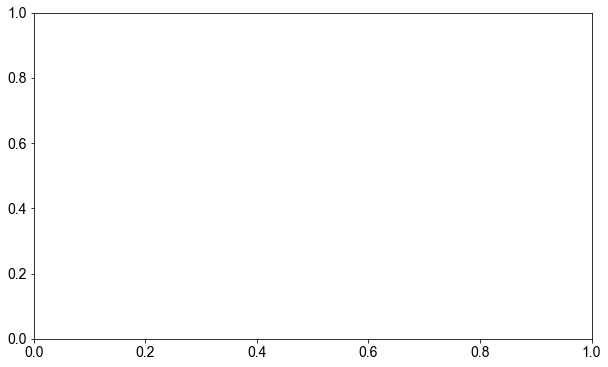

In [12]:
Data = np.dstack((mat['injArea'], mat['shamArea']))
avg_base = np.nanmean(Data[0:3,:,:], axis=0)
norm_Data = Data / avg_base

norm_avg_base = np.nanmean(norm_Data[0:3,:,:], axis=0)
norm_20 = norm_Data[4,:,:]
norm_avg_post = np.nanmean(norm_Data[4:9,:,:], axis=0)

norm = np.dstack((norm_avg_base, norm_20, norm_avg_post))
norm_avg = np.nanmean(norm, axis=0)
norm_sem = (np.nanstd(norm, axis=0)/np.sqrt(np.sum(~np.isnan(norm), axis=0)))



f, ax = plt.subplots(figsize=(10, 6))


g1 = np.array([0,3,6,9,12,15,18,21,24,27,30,33,36])
g2 = np.array([1,4,7,10,13,16,19,22,25,28,31,34,37])
g3 = np.array(g2)-0.5

bpl = plt.boxplot(ITI_events,positions = g1 , sym='', widths=0.6)
bpr = plt.boxplot(Trial_events,positions = g2 , sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Inter')
plt.plot([], c='#2C7BB6', label='Intra')
plt.legend()
x_label_list = ['B1','B2', 'B3','B4','B5','H1','H2', 'H3','H4','H7','H10','H14', 'H24']
ax.set_xticks(g3)
ax.set_xticklabels(x_label_list)

## J

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


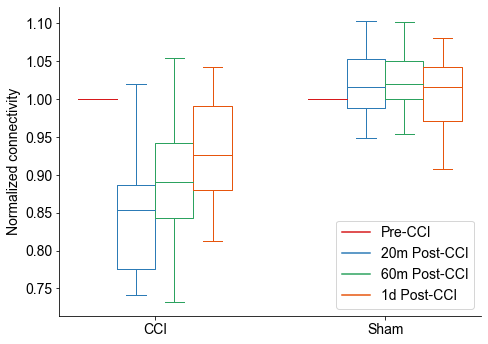

In [14]:
mat = scipy.io.loadmat('fig6_HIJ.mat')

Data = np.dstack((mat['injCon'], mat['shamCon']))
avg_base = Data[3,:,:]
norm_Data = Data / avg_base

norm_avg_base = norm_Data[3,:,:]
norm_20 = norm_Data[4,:,:]
norm_60 = norm_Data[5,:,:]
norm_1 = norm_Data[6,:,:]


def remove_nan(stupid):
    stupid_1 = stupid[~np.isnan(stupid[:,0]),0]
    stupid_2 = stupid[~np.isnan(stupid[:,1]),1]

    return [stupid_1, stupid_2]


norm_avg_base = remove_nan(norm_avg_base)
norm_20 = remove_nan(norm_20)
norm_60 = remove_nan(norm_60)
norm_1 = remove_nan(norm_1)


f, ax = plt.subplots(figsize=(7, 5))


g1 = np.array([0,3])
g2 = np.array([0.5,3.5])
g3 = np.array([1,4])
g4 = np.array([1.5,4.5])

bpb = plt.boxplot(norm_avg_base, positions = g1 , sym='', widths=0.5)
bp2 = plt.boxplot(norm_20, positions = g2 , sym='', widths=0.5)
bpp = plt.boxplot(norm_60, positions = g3, sym='', widths=0.5)
bpd = plt.boxplot(norm_1, positions = g4, sym='', widths=0.5)

set_box_color(bpb, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bp2, '#2C7BB6')
set_box_color(bpp, '#2CA25F')
set_box_color(bpd, '#E6550D')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Pre-CCI')
plt.plot([], c='#2C7BB6', label='20m Post-CCI')
plt.plot([], c='#2CA25F', label='60m Post-CCI')
plt.plot([], c='#E6550D', label='1d Post-CCI')
plt.legend()
x_label_list = ['CCI','Sham']
ax.set_xticks([0.75,3.75])
ax.set_xticklabels(x_label_list)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



plt.ylabel('Normalized connectivity')

plt.savefig('6J.eps')

plt.tight_layout()
plt.show()

<ipython-input-5-b29f651cbb5e>:2: RuntimeWarning: Mean of empty slice
  avg_base = np.nanmean(Data[0:3,:,:], axis=0)
<ipython-input-5-b29f651cbb5e>:5: RuntimeWarning: Mean of empty slice
  norm_avg_base = np.nanmean(norm_Data[0:3,:,:], axis=0)
<ipython-input-5-b29f651cbb5e>:7: RuntimeWarning: Mean of empty slice
  norm_avg_post = np.nanmean(norm_Data[4:9,:,:], axis=0)


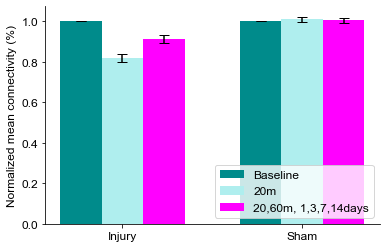

In [5]:
Data = np.dstack((mat['injCon'], mat['shamCon']))
avg_base = np.nanmean(Data[0:3,:,:], axis=0)
norm_Data = Data / avg_base

norm_avg_base = np.nanmean(norm_Data[0:3,:,:], axis=0)
norm_20 = norm_Data[4,:,:]
norm_avg_post = np.nanmean(norm_Data[4:9,:,:], axis=0)

norm = np.dstack((norm_avg_base, norm_20, norm_avg_post))
norm_avg = np.nanmean(norm, axis=0)
norm_sem = (np.nanstd(norm, axis=0)/np.sqrt(np.sum(~np.isnan(norm), axis=0)))

N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars
ind = ind*1.3
fig, ax = plt.subplots()
color_vector = ['darkcyan','paleturquoise','fuchsia']
rects = [0]*3 #Pre-alocate list

for x in range(0, 3):
    rects[x] = plt.bar(ind + (width * x), norm_avg[:,x], width, color=color_vector[x], yerr=norm_sem[:,x], capsize=5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Normalized mean connectivity (%)')
plt.xticks(ind + width, ('Injury', 'Sham'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend((rects[0], rects[1], rects[2]), ('Baseline', '20m','20,60m, 1,3,7,14days'), loc = 'lower right')
plt.show()

# Figure 7

In [14]:
Data = pd.read_csv("TBI_Data_2019.csv")
avg_Injured = Data[Data.injured == 1].groupby('Time').mean()
avg_Sham = Data[Data.injured == 0].groupby('Time').mean()
avg_Injuredm = Data.loc[(Data.injured == 1) & (Data.Gender == 'm')].groupby('Time').mean()
avg_Shamm = Data[(Data.injured == 0) & (Data.Gender == 'm')].groupby('Time').mean()
avg_Injuredf = Data[(Data.injured == 1) & (Data.Gender == 'f')].groupby('Time').mean()
avg_Shamf = Data[(Data.injured == 0) & (Data.Gender == 'f')].groupby('Time').mean()

sem_Injured = Data[Data.injured == 1].groupby('Time').sem()
sem_Sham = Data[Data.injured == 0].groupby('Time').sem()
sem_Injuredm = Data.loc[(Data.injured == 1) & (Data.Gender == 'm')].groupby('Time').sem()
sem_Shamm = Data[(Data.injured == 0) & (Data.Gender == 'm')].groupby('Time').sem()
sem_Injuredf = Data[(Data.injured == 1) & (Data.Gender == 'f')].groupby('Time').sem()
sem_Shamf = Data[(Data.injured == 0) & (Data.Gender == 'f')].groupby('Time').sem()
print(Data.keys())
#labels = ['-7', '-6', '-4', '-20m', '10m', '20m', '60m', '1', '3', '7', '14', '56']
labels = [-7.0, -6.0, -4.0, -0.014, 0.007, 0.014, 0.042, 1.0, 3.0, 7.0, 14.0, 56.0]
x = np.arange(12)


Index(['mouseID', 'Time', 'Gender', 'injured', 'CaAmplit', 'CaArea', 'rearing',
       'grooming', 'NCaAmplit', 'NCaArea', 'Nrearing', 'Ngrooming'],
      dtype='object')


C:\Users\tomva\anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:1508: RuntimeWarning: divide by zero encountered in true_divide
  result.iloc[:, cols].values / np.sqrt(self.count().iloc[:, cols]).values
C:\Users\tomva\anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:1508: RuntimeWarning: divide by zero encountered in true_divide
  result.iloc[:, cols].values / np.sqrt(self.count().iloc[:, cols]).values
C:\Users\tomva\anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:1508: RuntimeWarning: divide by zero encountered in true_divide
  result.iloc[:, cols].values / np.sqrt(self.count().iloc[:, cols]).values
C:\Users\tomva\anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:1508: RuntimeWarning: divide by zero encountered in true_divide
  result.iloc[:, cols].values / np.sqrt(self.count().iloc[:, cols]).values
C:\Users\tomva\anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:1508: RuntimeWarning: divide by zero encountered in true_divide
  result.i

In [15]:
Data[Data.injured == 0].groupby('Time').std()

,injured,CaAmplit,CaArea,rearing,grooming,NCaAmplit,NCaArea,Nrearing,Ngrooming
Time,,,,,,,,,
-7.000,0.0,1.654102,315.712800,22.917639,21.610183,0.324017,0.455108,0.344193,0.249940
-6.000,0.0,1.202193,300.210584,18.555078,12.817602,0.212310,0.428582,0.234794,0.152094
-4.000,0.0,0.772290,276.712046,17.578396,16.297239,0.305425,0.334640,0.278080,0.264643
-0.014,0.0,1.293217,191.076553,11.417690,15.040551,0.287922,0.440990,0.167468,0.292522
0.000,0.0,NaN,NaN,8.532292,12.258578,NaN,NaN,0.188393,0.241504
0.014,0.0,1.206121,166.995571,10.963576,11.483585,0.516745,0.452304,0.221277,0.399818
0.042,0.0,1.406137,333.691375,14.772210,14.274580,0.479178,0.331624,0.284394,0.355292
1.000,0.0,1.577773,265.124874,14.979987,13.300034,0.434077,1.097075,0.218423,0.326584
3.000,0.0,1.872717,116.920936,7.551038,11.342599,0.749277,0.514864,0.181863,0.334002


## A

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

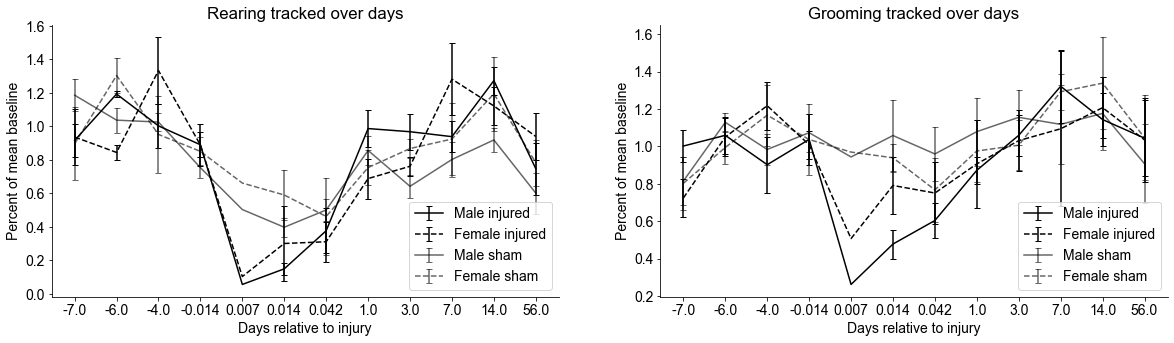

In [16]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax = plt.subplot(121)
a = plt.errorbar(x,avg_Injuredm['Nrearing'].values, fmt='k-', yerr=sem_Injuredm['Nrearing'].values, capsize=3)
b = plt.errorbar(x,avg_Injuredf['Nrearing'].values, fmt='k--', yerr=sem_Injuredf['Nrearing'].values, capsize=3)
c = plt.errorbar(x,avg_Shamm['Nrearing'].values, fmt='k-', alpha=0.6, yerr=sem_Shamm['Nrearing'].values, capsize=3)
d = plt.errorbar(x,avg_Shamf['Nrearing'].values, fmt='k--', alpha=0.6, yerr=sem_Shamf['Nrearing'].values, capsize=3)
plt.legend((a,b,c,d), ('Male injured', 'Female injured','Male sham', 'Female sham'), loc = 'lower right')
plt.xticks(x,labels)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Days relative to injury')
plt.ylabel('Percent of mean baseline')
plt.title('Rearing tracked over days')


ax = plt.subplot(122)
a = plt.errorbar(x,avg_Injuredm['Ngrooming'].values, fmt='k-', yerr=sem_Injuredm['Ngrooming'].values, capsize=3)
b = plt.errorbar(x,avg_Injuredf['Ngrooming'].values, fmt='k--', yerr=sem_Injuredf['Ngrooming'].values, capsize=3)
c = plt.errorbar(x,avg_Shamm['Ngrooming'].values, fmt='k-', alpha=0.6, yerr=sem_Shamm['Ngrooming'].values, capsize=3)
d = plt.errorbar(x,avg_Shamf['Ngrooming'].values, fmt='k--', alpha=0.6, yerr=sem_Shamf['Ngrooming'].values, capsize=3)
plt.legend((a,b,c,d), ('Male injured', 'Female injured','Male sham', 'Female sham'), loc = 'lower right')
plt.xticks(x,labels)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Days relative to injury')
plt.ylabel('Percent of mean baseline')
plt.title('Grooming tracked over days')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('7A.eps')


In [23]:
print(sem_Sham)

         injured  CaAmplit      CaArea   rearing  grooming  NCaAmplit  \
Time                                                                    
-7.000       0.0  0.498731   95.190991  6.909928  7.640353   0.097695   
-6.000       0.0  0.362475   90.516897  5.594566  4.053281   0.064014   
-4.000       0.0  0.232854   83.431821  5.300086  4.913802   0.092089   
-0.014       0.0  0.389919   57.611748  3.442563  4.534897   0.086812   
 0.000       0.0       NaN         NaN       inf       inf        NaN   
 0.014       0.0  0.363659   50.351059  3.305643  3.462431   0.155804   
 0.042       0.0  0.423966  100.611735  4.453989  4.514019   0.144478   
 1.000       0.0  0.475716   79.938157  4.516636  5.026940   0.130879   
 3.000       0.0  0.564645   35.252989  2.387848  3.586845   0.225915   
 7.000       0.0  0.365710   96.694579  3.724611  5.105157   0.111623   
 14.000      0.0  0.225264   97.754563  4.357761  5.710525   0.084969   
 56.000      0.0  0.455639   21.456567  3.733874  7

## B

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

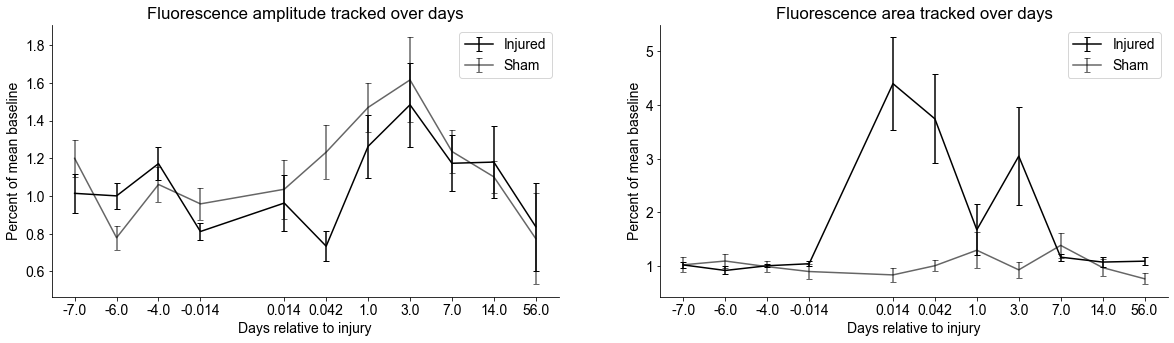

In [19]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax = plt.subplot(121)
a = plt.errorbar(x[x != 4],np.delete(avg_Injured['NCaAmplit'].values,4), fmt='k-', yerr=np.delete(sem_Injured['NCaAmplit'].values,4), capsize=3)
c = plt.errorbar(x[x != 4],np.delete(avg_Sham['NCaAmplit'].values,4), fmt='k-', alpha=0.6, yerr=np.delete(sem_Sham['NCaAmplit'].values,4), capsize=3)
plt.legend((a,c), ('Injured','Sham'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(x[x != 4],labels1[labels1 != 0.007])
plt.xlabel('Days relative to injury')
plt.ylabel('Percent of mean baseline')
plt.title('Fluorescence amplitude tracked over days')


ax = plt.subplot(122)
a = plt.errorbar(x[x != 4],np.delete(avg_Injured['NCaArea'].values,4), fmt='k-', yerr=np.delete(sem_Injured['NCaArea'].values,4), capsize=3)
c = plt.errorbar(x[x != 4],np.delete(avg_Sham['NCaArea'].values,4), fmt='k-', alpha=0.6, yerr=np.delete(sem_Sham['NCaArea'].values,4), capsize=3)
plt.legend((a,c), ('Injured','Sham'))
plt.xticks(x[x != 4],labels1[labels1 != 0.007])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Days relative to injury')
plt.ylabel('Percent of mean baseline')
plt.title('Fluorescence area tracked over days')

#plt.savefig('7B.eps')



In [18]:
labels1 = np.array(labels)
labels1[labels1 != 0.007]

array([-7.0e+00, -6.0e+00, -4.0e+00, -1.4e-02,  1.4e-02,  4.2e-02,
        1.0e+00,  3.0e+00,  7.0e+00,  1.4e+01,  5.6e+01])

In [76]:
np.array(labels) != 0.007

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True])

## C

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

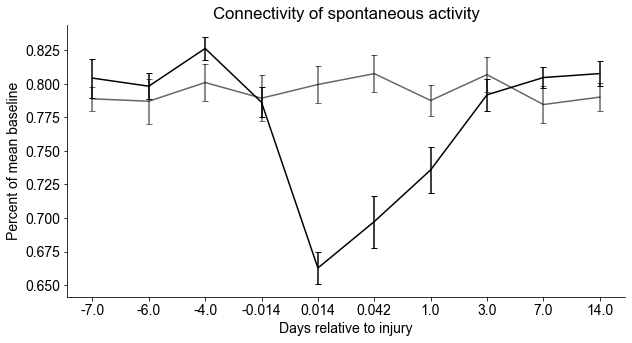

In [20]:
mat = scipy.io.loadmat('fig7_ABC.mat')

Data = mat['conn']

Injured = Data[:,0:13]
Sham = Data[:,14:]

avg_CInj = np.nanmean(Injured, axis=1)
avg_CSha = np.nanmean(Sham, axis=1)

sem_CInj = (np.nanstd(Injured, axis=1)/np.sqrt(np.sum(~np.isnan(Injured), axis=1)))
sem_CSha = (np.nanstd(Sham, axis=1)/np.sqrt(np.sum(~np.isnan(Sham), axis=1)))
labels = np.array((-7.0, -6.0, -4.0, -0.014, 0.014, 0.042, 1.0, 3.0, 7.0, 14.0))
x = np.arange(10)


# create plot
fig, ax = plt.subplots(figsize=(10,5))

ax.errorbar(x, avg_CInj, fmt='k-', yerr=sem_CInj, capsize=3)
ax.errorbar(x, avg_CSha, fmt='k-', alpha=0.6, yerr=sem_CSha, capsize=3)
ax.set_title('Connectivity of spontaneous activity')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(x, labels)
ax.set_ylabel('Percent of mean baseline')
ax.set_xlabel('Days relative to injury')
#plt.savefig('7C.eps')

plt.show()



# Figure 8

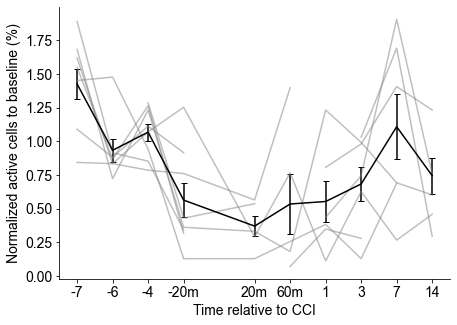

In [21]:
mat = scipy.io.loadmat('SpontNumberOverTime.mat')
number = mat['number']
#Data = np.dstack((mat['IR'], mat['W'], mat['D'], mat['R']))

number_base = np.nanmean(number[0:4,:], axis=0)

norm_number = number / number_base

sem_number = (np.nanstd(norm_number, axis=1)/np.sqrt(np.sum(~np.isnan(norm_number), axis=1)))

avg_norm = np.nanmean(norm_number, axis = 1)

# create plot
fig, ax = plt.subplots(figsize=(7,5))
index = [-4,-3,-2,-1,1,2,3,4,5,6]
labels = ['-7','-6','-4','-20m','20m','60m','1','3','7','14']

ax.errorbar(index, avg_norm, fmt='k-', yerr=sem_number, capsize=3)
ax.plot(index, norm_number, '0.5', alpha = 0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(index, labels)
ax.set_ylabel('Normalized active cells to baseline (%)')
ax.set_xlabel('Time relative to CCI')

#plt.savefig('NormSponCells_overdays.png')

plt.show()

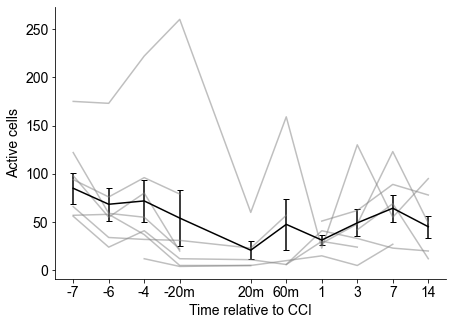

In [22]:
mat = scipy.io.loadmat('SpontNumberOverTime.mat')
number = mat['number']
#Data = np.dstack((mat['IR'], mat['W'], mat['D'], mat['R']))

number_base = np.nanmean(number[0:4,:], axis=0)



sem_number = (np.nanstd(number, axis=1)/np.sqrt(np.sum(~np.isnan(number), axis=1)))

avg_norm = np.nanmean(number, axis = 1)

# create plot
fig, ax = plt.subplots(figsize=(7,5))
index = [-4,-3,-2,-1,1,2,3,4,5,6]
labels = ['-7','-6','-4','-20m','20m','60m','1','3','7','14']

ax.errorbar(index, avg_norm, fmt='k-', yerr=sem_number, capsize=3)
ax.plot(index, number, '0.5', alpha = 0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(index, labels)
ax.set_ylabel('Active cells')
ax.set_xlabel('Time relative to CCI')

#plt.savefig('SponCells_overdays.png')

plt.show()

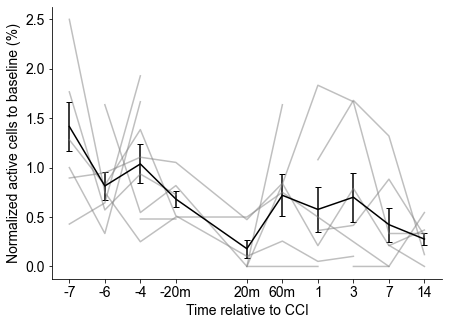

In [23]:
mat = scipy.io.loadmat('WhNumberOverTime.mat')
number = mat['b7']
#Data = np.dstack((mat['IR'], mat['W'], mat['D'], mat['R']))

number_base = np.nanmean(number[0:4,:], axis=0)

norm_number = number / number_base

sem_number = (np.nanstd(norm_number, axis=1)/np.sqrt(np.sum(~np.isnan(norm_number), axis=1)))

avg_norm = np.nanmean(norm_number, axis = 1)

# create plot
fig, ax = plt.subplots(figsize=(7,5))
index = [-4,-3,-2,-1,1,2,3,4,5,6]
labels = ['-7','-6','-4','-20m','20m','60m','1','3','7','14']

ax.errorbar(index, avg_norm, fmt='k-', yerr=sem_number, capsize=3)
ax.plot(index, norm_number, '0.5', alpha = 0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(index, labels)
ax.set_ylabel('Normalized active cells to baseline (%)')
ax.set_xlabel('Time relative to CCI')

#plt.savefig('NormWhCells_overdays.png')

plt.show()

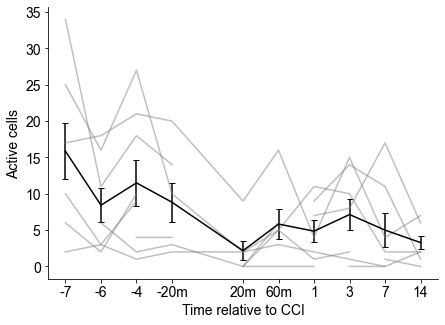

In [24]:
mat = scipy.io.loadmat('WhNumberOverTime.mat')
number = mat['b7']
#Data = np.dstack((mat['IR'], mat['W'], mat['D'], mat['R']))

sem_number = (np.nanstd(number, axis=1)/np.sqrt(np.sum(~np.isnan(number), axis=1)))

avg_norm = np.nanmean(number, axis = 1)

# create plot
fig, ax = plt.subplots(figsize=(7,5))
index = [-4,-3,-2,-1,1,2,3,4,5,6]
labels = ['-7','-6','-4','-20m','20m','60m','1','3','7','14']

ax.errorbar(index, avg_norm, fmt='k-', yerr=sem_number, capsize=3)
ax.plot(index, number, '0.5', alpha = 0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(index, labels)
ax.set_ylabel('Active cells')
ax.set_xlabel('Time relative to CCI')

#plt.savefig('WhCells_overdays.png')

plt.show()

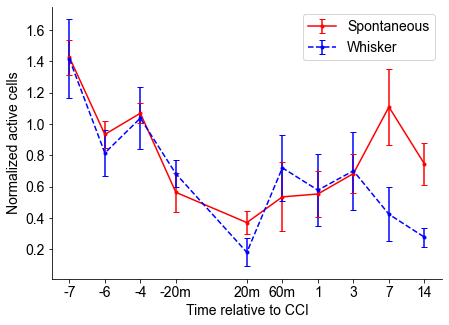

In [25]:
mat1 = scipy.io.loadmat('SpontNumberOverTime.mat')
number1 = mat1['number']
#Data = np.dstack((mat['IR'], mat['W'], mat['D'], mat['R']))

number_base1 = np.nanmean(number1[0:4,:], axis=0)

norm_number1 = number1 / number_base1

sem_number1 = (np.nanstd(norm_number1, axis=1)/np.sqrt(np.sum(~np.isnan(norm_number1), axis=1)))

avg_norm1 = np.nanmean(norm_number1, axis = 1)

mat2 = scipy.io.loadmat('WhNumberOverTime.mat')
number2 = mat2['b7']
#Data = np.dstack((mat['IR'], mat['W'], mat['D'], mat['R']))

number_base2 = np.nanmean(number2[0:4,:], axis=0)

norm_number2 = number2 / number_base2

sem_number2 = (np.nanstd(norm_number2, axis=1)/np.sqrt(np.sum(~np.isnan(norm_number2), axis=1)))

avg_norm2 = np.nanmean(norm_number2, axis = 1)

# create plot
fig, ax = plt.subplots(figsize=(7,5))
index = [-4,-3,-2,-1,1,2,3,4,5,6]
labels = ['-7','-6','-4','-20m','20m','60m','1','3','7','14']

a = ax.errorbar(index, avg_norm1, fmt='.r-', yerr=sem_number1, capsize=3)
c = ax.errorbar(index, avg_norm2, fmt='.b--', yerr=sem_number2, capsize=3)

plt.legend((a,c), ('Spontaneous','Whisker'))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(index, labels)
ax.set_ylabel('Normalized active cells')
ax.set_xlabel('Time relative to CCI')

#plt.savefig('2P_Cells_overdays.png')

plt.show()

In [5]:
Data = scipy.io.loadmat('s2p_TBI.mat')
Data = np.array(Data['s2pTBI'])
np.shape(Data)

(8, 20)

In [9]:
S_base = np.nanmean(Data[:,0:10], axis = 0)
W_base = np.nanmean(Data[:,10:20], axis = 0)


array([1.16034507, 0.85171521, 0.96940412, 0.68225776, 0.24825911,
       0.47965185, 0.29878918, 0.49189675, 0.48850946, 0.45764701])

In [2]:





number_base2 = np.nanmean(number2[0:4,:], axis=0)

norm_number2 = number2 / number_base2

sem_number2 = (np.nanstd(norm_number2, axis=1)/np.sqrt(np.sum(~np.isnan(norm_number2), axis=1)))

avg_norm2 = np.nanmean(norm_number2, axis = 1)

# create plot
fig, ax = plt.subplots(figsize=(7,5))
index = [-4,-3,-2,-1,1,2,3,4,5,6]
labels = ['-7','-6','-4','-20m','20m','60m','1','3','7','14']

a = ax.errorbar(index, avg_norm1, fmt='.r-', yerr=sem_number1, capsize=3)
c = ax.errorbar(index, avg_norm2, fmt='.b--', yerr=sem_number2, capsize=3)

plt.legend((a,c), ('Spontaneous','Whisker'))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(index, labels)
ax.set_ylabel('Normalized active cells')
ax.set_xlabel('Time relative to CCI')

plt.show()

NameError: name 'np' is not defined